#Build LSI model using gensim

In [ ]:
#Import the required library
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Loading Data (download articles.txt)

In [ ]:

def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles


#Preprocessing Data

In [ ]:

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


#Prepare Corpus

In [ ]:

#you need to create a document-term matrix and dictionary of terms.
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix


#Create an LSA model using Gensim

In [ ]:

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel



#Create an LSA model using Gensim

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


#plot coherence score values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()


# LSA Model

In [ ]:

number_of_topics=7
words=10
document_list,titles=load_data("","articles.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)


Total Number of Documents: 832
[(0, '0.863*"â" + 0.159*"trump" + 0.127*"said" + 0.123*"say" + 0.074*"peopl" + 0.072*"one" + 0.071*"would" + 0.064*"year" + 0.060*"go" + 0.060*"campaign"'), (1, '-0.419*"trump" + 0.192*"year" + -0.170*"â" + 0.162*"hammond" + 0.157*"brexit" + 0.156*"eu" + 0.141*"say" + 0.140*"govern" + 0.136*"statement" + 0.120*"uk"'), (2, '0.515*"trump" + -0.312*"â" + 0.213*"presid" + 0.211*"elect" + 0.187*"said" + 0.164*"vote" + -0.148*"min" + 0.138*"campaign" + 0.133*"trumpâ" + 0.128*"poll"'), (3, '0.333*"vote" + 0.330*"poll" + -0.225*"say" + 0.202*"remain" + -0.195*"statement" + -0.194*"hammond" + 0.177*"leav" + 0.149*"station" + -0.142*"autumn" + -0.142*"govern"'), (4, '-0.440*"min" + -0.226*"trump" + 0.172*"â" + -0.161*"0" + -0.156*"goal" + -0.148*"leagu" + -0.146*"ball" + -0.146*"1" + 0.140*"vote" + -0.129*"play"'), (5, '0.304*"say" + -0.216*"bank" + -0.209*"said" + 0.203*"vote" + 0.188*"poll" + -0.165*"would" + -0.157*"work" + 0.150*"min" + -0.134*"presid" + -0.132

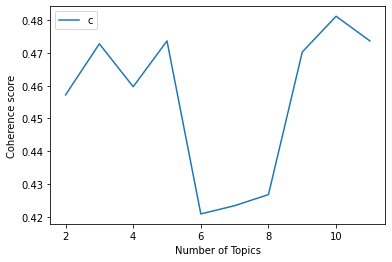

In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)


#Latent Dirichlet Algorithm

In [ ]:
#installstop_words
!pip install stop_words


In [ ]:
#import all the packages
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
tokenizer = RegexpTokenizer(r'\w+')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# create English stop words list
en_stop = get_stop_words('en')


In [ ]:
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [ ]:
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."


In [ ]:
# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]


In [ ]:
# list for tokenized documents in loop
texts = []


In [ ]:
# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)


In [ ]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

# print the topics
print(ldamodel.print_topics(num_topics=5, num_words=4))


[(0, '0.081*"health" + 0.059*"drive" + 0.058*"pressur" + 0.035*"expert"'), (1, '0.086*"good" + 0.086*"brocolli" + 0.072*"mother" + 0.072*"brother"')]


In [ ]:
# find the coherence score
from gensim.models.coherencemodel import CoherenceModel
def calculate_coherence_score(documents, dictionary,model):
  coherence_model=CoherenceModel(model=model,texts=documents,dictionary=dictionary,coherence='c_v')
  return coherence_model.get_coherence()

def get_coherence_values(start,stop):
  for num_topics in range(start,stop):
    print(f'\nCalculating coherence for {num_topics} topics')
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)
    coherence=calculate_coherence_score(texts,dictionary,ldamodel)
    yield coherence


In [ ]:
# create a list of the coherence scores from 10 to 30 topics.
min_topics,max_topics=50,80
coherence_scores=list(get_coherence_values(min_topics,max_topics))




Calculating coherence for 50 topics

Calculating coherence for 51 topics

Calculating coherence for 52 topics

Calculating coherence for 53 topics

Calculating coherence for 54 topics

Calculating coherence for 55 topics

Calculating coherence for 56 topics

Calculating coherence for 57 topics

Calculating coherence for 58 topics

Calculating coherence for 59 topics

Calculating coherence for 60 topics

Calculating coherence for 61 topics

Calculating coherence for 62 topics

Calculating coherence for 63 topics

Calculating coherence for 64 topics

Calculating coherence for 65 topics

Calculating coherence for 66 topics

Calculating coherence for 67 topics

Calculating coherence for 68 topics

Calculating coherence for 69 topics

Calculating coherence for 70 topics

Calculating coherence for 71 topics

Calculating coherence for 72 topics

Calculating coherence for 73 topics

Calculating coherence for 74 topics

Calculating coherence for 75 topics

Calculating coherence for 76 topics



Text(0.5, 1.0, 'Coherence Scores')

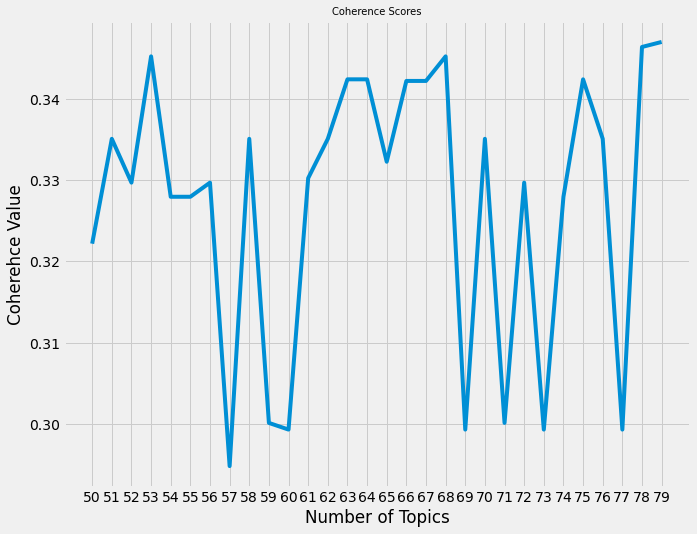

In [ ]:
# plot the curve
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import MaxNLocator
style.use('fivethirtyeight')
x=[int(i) for i in range(min_topics,max_topics)]
ax=plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x,coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherehce Value')
plt.title('Coherence Scores',fontsize=10)

